In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import csv
from sklearn.metrics import roc_auc_score
from datetime import datetime
import sys
import os


In [15]:
tier = 'IRON'
df = pd.read_csv(f'../Dataset/preProcessed/{tier}.csv')

In [17]:

data = df[['Diff_FirstBLOOD','Diff_FirstDRAGON','Diff_Kill','Diff_Asisst','Diff_LV','Diff_CS','Diff_Death','Diff_WARDplaced','Diff_WARDkill','Diff_controlWARDPlaced','Diff_jglCS','FirstDragon_AIR_DRAGON','FirstDragon_EARTH_DRAGON','FirstDragon_FIRE_DRAGON','FirstDragon_WATER_DRAGON','FirstDragon_HEXTECH_DRAGON','FirstDragon_CHEMTECH_DRAGON', 'result']]



# global win_df, lose_df
# win_df = df[['Diff_FirstBLOOD', 'Diff_FirstDRAGON',
#        'Diff_FirstHERALD', 'Diff_Firsttower', 'dragonType', 'WIN_invadeKill', 'WIN_invadeDeath','WIN_controlWARDPlaced', 
#        'WIN_Kill_top', 'WIN_Kill_jgl', 'WIN_Kill_mid', 'WIN_Kill_ad', 'WIN_Kill_sup',
#        'WIN_Death_top', 'WIN_Death_jgl', 'WIN_Death_mid', 'WIN_Death_ad', 'WIN_Death_sup', 
#        'WIN_Asisst_top', 'WIN_Asisst_jgl', 'WIN_Asisst_mid', 'WIN_Asisst_ad', 'WIN_Asisst_sup',
#        'WIN_LV_top', 'WIN_LV_jgl', 'WIN_LV_mid', 'WIN_LV_ad', 'WIN_LV_sup',
#        'WIN_CS_top', 'WIN_CS_jgl', 'WIN_CS_mid', 'WIN_CS_ad', 'WIN_CS_sup',
#        'WIN_jglCS_top', 'WIN_jglCS_jgl', 'WIN_jglCS_mid', 'WIN_jglCS_ad', 'WIN_jglCS_sup',
#        'WIN_GOLD_top', 'WIN_GOLD_jgl', 'WIN_GOLD_mid', 'WIN_GOLD_ad', 'WIN_GOLD_sup',
#        'WIN_WARDkill', 'WIN_Inhibitor','WIN_TOWERkill', 'WIN_WARDplaced']]
# lose_df = df[['Diff_FirstBLOOD', 'Diff_FirstDRAGON',
#        'Diff_FirstHERALD', 'Diff_Firsttower', 'dragonType',
#        'LOSE_invadeDeath', 'LOSE_invadeKill',
#        'LOSE_controlWARDPlaced',
#        'LOSE_Kill_top', 'LOSE_Kill_jgl', 'LOSE_Kill_mid', 'LOSE_Kill_ad', 'LOSE_Kill_sup',
#        'LOSE_Death_top', 'LOSE_Death_jgl',
#        'LOSE_Death_mid', 'LOSE_Death_ad', 'LOSE_Death_sup',
#        'LOSE_Asisst_top', 'LOSE_Asisst_jgl', 'LOSE_Asisst_mid',
#        'LOSE_Asisst_ad', 'LOSE_Asisst_sup',
#        'LOSE_LV_top', 'LOSE_LV_jgl',
#        'LOSE_LV_mid', 'LOSE_LV_ad', 'LOSE_LV_sup',
#        'LOSE_CS_top', 'LOSE_CS_jgl',
#        'LOSE_CS_mid', 'LOSE_CS_ad', 'LOSE_CS_sup',
#        'LOSE_jglCS_top', 'LOSE_jglCS_jgl', 'LOSE_jglCS_mid', 'LOSE_jglCS_ad', 'LOSE_jglCS_sup',
#        'LOSE_GOLD_top', 'LOSE_GOLD_jgl',
#        'LOSE_GOLD_mid', 'LOSE_GOLD_ad', 'LOSE_GOLD_sup',
#        'LOSE_WARDkill', 'LOSE_Inhibitor',
#        'LOSE_TOWERkill', 'LOSE_WARDplaced']]
# colName = 'WIN'
# win_df = win_df.rename(columns={f'{colName}_invadeKill': 'invadeKill', f'{colName}_invadeDeath': 'invadeDeath', 
#                                                   f'{colName}_controlWARDPlaced': 'controlWARDPlaced', f'{colName}_WARDplaced': 'WARDPlaced',
#                                                   f'{colName}_Kill_top': 'Kill_top',f'{colName}_Kill_jgl': 'Kill_jgl',f'{colName}_Kill_mid': 'Kill_mid',f'{colName}_Kill_ad': 'Kill_ad', f'{colName}_Kill_sup': 'Kill_sup',
#                                                   f'{colName}_Death_top': 'Death_top',f'{colName}_Death_jgl': 'Death_jgl',f'{colName}_Death_mid': 'Death_mid',f'{colName}_Death_ad': 'Death_ad',f'{colName}_Death_sup': 'Death_sup',
#                                                   f'{colName}_Asisst_top': 'Asisst_top',f'{colName}_Asisst_jgl': 'Asisst_jgl',f'{colName}_Asisst_mid': 'Asisst_mid',f'{colName}_Asisst_ad': 'Asisst_ad',f'{colName}_Asisst_sup': 'Asisst_sup',
#                                                   f'{colName}_LV_top': 'LV_top',f'{colName}_LV_jgl': 'LV_jgl',f'{colName}_LV_mid': 'LV_mid',f'{colName}_LV_ad': 'LV_ad',f'{colName}_LV_sup': 'LV_sup',
#                                                   f'{colName}_CS_top': 'CS_top',f'{colName}_CS_jgl': 'CS_jgl',f'{colName}_CS_mid': 'CS_mid',f'{colName}_CS_ad': 'CS_ad',f'{colName}_CS_sup': 'CS_sup',
#                                                   f'{colName}_jglCS_top': 'jglCS_top',f'{colName}_jglCS_jgl': 'jglCS_jgl',f'{colName}_jglCS_mid': 'jglCS_mid',f'{colName}_jglCS_ad': 'jglCS_ad',f'{colName}_jglCS_sup': 'jglCS_sup',
#                                                   f'{colName}_GOLD_top': 'GOLD_top',f'{colName}_GOLD_jgl': 'GOLD_jgl',f'{colName}_GOLD_mid': 'GOLD_mid',f'{colName}_GOLD_ad': 'GOLD_ad',f'{colName}_GOLD_sup': 'GOLD_sup',
#                                                   f'{colName}_WARDkill': 'WARDkill',f'{colName}_Inhibitor': 'Inhibitor',f'{colName}_TOWERkill': 'TOWERkill',f'{colName}_WARDplaced': 'WARDplaced'})

# colName = 'LOSE'
# lose_df = lose_df.rename(columns={f'{colName}_invadeKill': 'invadeKill', f'{colName}_invadeDeath': 'invadeDeath', 
#                                                   f'{colName}_controlWARDPlaced': 'controlWARDPlaced', f'{colName}_WARDplaced': 'WARDPlaced',
#                                                   f'{colName}_Kill_top': 'Kill_top',f'{colName}_Kill_jgl': 'Kill_jgl',f'{colName}_Kill_mid': 'Kill_mid',f'{colName}_Kill_ad': 'Kill_ad', f'{colName}_Kill_sup': 'Kill_sup',
#                                                   f'{colName}_Death_top': 'Death_top',f'{colName}_Death_jgl': 'Death_jgl',f'{colName}_Death_mid': 'Death_mid',f'{colName}_Death_ad': 'Death_ad',f'{colName}_Death_sup': 'Death_sup',
#                                                   f'{colName}_Asisst_top': 'Asisst_top',f'{colName}_Asisst_jgl': 'Asisst_jgl',f'{colName}_Asisst_mid': 'Asisst_mid',f'{colName}_Asisst_ad': 'Asisst_ad',f'{colName}_Asisst_sup': 'Asisst_sup',
#                                                   f'{colName}_LV_top': 'LV_top',f'{colName}_LV_jgl': 'LV_jgl',f'{colName}_LV_mid': 'LV_mid',f'{colName}_LV_ad': 'LV_ad',f'{colName}_LV_sup': 'LV_sup',
#                                                   f'{colName}_CS_top': 'CS_top',f'{colName}_CS_jgl': 'CS_jgl',f'{colName}_CS_mid': 'CS_mid',f'{colName}_CS_ad': 'CS_ad',f'{colName}_CS_sup': 'CS_sup',
#                                                   f'{colName}_jglCS_top': 'jglCS_top',f'{colName}_jglCS_jgl': 'jglCS_jgl',f'{colName}_jglCS_mid': 'jglCS_mid',f'{colName}_jglCS_ad': 'jglCS_ad',f'{colName}_jglCS_sup': 'jglCS_sup',
#                                                   f'{colName}_GOLD_top': 'GOLD_top',f'{colName}_GOLD_jgl': 'GOLD_jgl',f'{colName}_GOLD_mid': 'GOLD_mid',f'{colName}_GOLD_ad': 'GOLD_ad',f'{colName}_GOLD_sup': 'GOLD_sup',
#                                                   f'{colName}_WARDkill': 'WARDkill',f'{colName}_Inhibitor': 'Inhibitor',f'{colName}_TOWERkill': 'TOWERkill',f'{colName}_WARDplaced': 'WARDplaced'})
# # win_df['result'] = 1
# lose_df['result'] = -1
# data = pd.concat([win_df, lose_df], axis=0, ignore_index=True)

In [4]:
def mergeCol(colName):
    global win_df, lose_df
    win_df[colName] = (win_df[f'{colName}_ad']+win_df[f'{colName}_top']+win_df[f'{colName}_jgl']+win_df[f'{colName}_mid']+win_df[f'{colName}_sup'])
    lose_df[colName] = (lose_df[f'{colName}_ad']+lose_df[f'{colName}_top']+lose_df[f'{colName}_jgl']+lose_df[f'{colName}_mid']+lose_df[f'{colName}_sup'])
    win_df= win_df.drop([f'{colName}_ad', f'{colName}_top', f'{colName}_jgl', f'{colName}_mid', f'{colName}_sup'],axis=1)
    lose_df= lose_df.drop([f'{colName}_ad', f'{colName}_top', f'{colName}_jgl', f'{colName}_mid', f'{colName}_sup'],axis=1)
    return win_df, lose_df
def mulMinus1(colName):
    global win_df, lose_df
    win_df[f'Diff_{colName}'] = win_df[colName]-lose_df[colName]
    lose_df[f'Diff_{colName}'] = win_df[f'Diff_{colName}']*-1
    win_df = win_df.drop([colName], axis=1)
    lose_df = lose_df.drop([colName], axis=1)
    return win_df, lose_df


win_df, lose_df = mergeCol('LV')
win_df, lose_df = mergeCol('CS')
win_df, lose_df = mergeCol('jglCS')
win_df, lose_df = mergeCol('Kill')
win_df, lose_df = mergeCol('Asisst')
win_df, lose_df = mergeCol('Death')
win_df, lose_df = mergeCol('GOLD')

win_df, lose_df = mulMinus1('LV')
win_df, lose_df = mulMinus1('CS')
win_df, lose_df = mulMinus1('jglCS')
win_df, lose_df = mulMinus1('Kill')
win_df, lose_df = mulMinus1('Asisst')
win_df, lose_df = mulMinus1('WARDplaced')
win_df, lose_df = mulMinus1('WARDkill')
win_df, lose_df = mulMinus1('Inhibitor')
win_df, lose_df = mulMinus1('TOWERkill')

lose_df['Diff_FirstBLOOD'] = win_df['Diff_FirstBLOOD'] * -1
lose_df['Diff_FirstDRAGON'] = win_df['Diff_FirstDRAGON'] * -1
lose_df['Diff_FirstHERALD'] = win_df['Diff_FirstHERALD'] * -1
lose_df['Diff_Firsttower'] = win_df['Diff_Firsttower'] * -1

win_df = win_df.drop(['invadeKill', 'invadeDeath', 'controlWARDPlaced', 'Death', 'GOLD'], axis=1)
lose_df = lose_df.drop(['invadeKill', 'invadeDeath', 'controlWARDPlaced', 'Death', 'GOLD'], axis=1)

win_df.dropna(axis = 0, how = 'any', inplace = True)
lose_df.dropna(axis = 0, how = 'any', inplace = True)

In [18]:
# plt.figure(figsize=(30, 20))  # 그림 크기 설정 (선택 사항)
# sns.lineplot(x=win_df.index, y='Kill', data=win_df)
# # x축 레이블 및 그래프 제목 추가 (선택 사항)
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Time Series Data Visualization')

# # 그래프 표시
# plt.show()

In [5]:
win_df['result'] = 1
lose_df['result'] = 0
data = pd.concat([win_df, lose_df], axis=0, ignore_index=True)

In [18]:
display(data)


,Diff_FirstBLOOD,Diff_FirstDRAGON,Diff_Kill,Diff_Asisst,Diff_LV,Diff_CS,Diff_Death,Diff_WARDplaced,Diff_WARDkill,Diff_controlWARDPlaced,Diff_jglCS,FirstDragon_AIR_DRAGON,FirstDragon_EARTH_DRAGON,FirstDragon_FIRE_DRAGON,FirstDragon_WATER_DRAGON,FirstDragon_HEXTECH_DRAGON,FirstDragon_CHEMTECH_DRAGON,result
0,-1,0,0.0,-17.0,1.0,-17.0,0.0,-1.0,1.0,1.0,4.0,0,0,0,0,0,0,1
1,-1,-1,2.0,11.0,-1.0,-8.0,-2.0,-6.0,1.0,-1.0,0.0,0,0,0,0,0,0,1
2,1,1,-4.0,-20.0,0.0,45.0,5.0,11.0,0.0,1.0,12.0,0,0,0,0,1,0,1
3,-1,0,-2.0,-12.0,-1.0,19.0,2.0,3.0,-1.0,0.0,-16.0,0,0,0,0,0,0,1
4,-1,0,-3.0,-5.0,-1.0,-9.0,3.0,-4.0,0.0,-1.0,10.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,-1,0,2.0,33.0,0.0,56.0,-2.0,-1.0,0.0,-1.0,-20.0,0,0,0,0,0,0,0
9036,1,-1,-4.0,-6.0,-2.0,-28.0,4.0,-7.0,3.0,-1.0,-23.0,0,0,0,0,0,0,0
9037,1,-1,2.0,-1.0,0.0,48.0,-2.0,2.0,0.0,2.0,4.0,0,0,0,0,0,0,0
9038,1,0,1.0,14.0,-1.0,-49.0,-1.0,-6.0,0.0,-2.0,8.0,0,0,0,0,0,0,0


In [7]:
data['FirstDragon_AIR_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 1), 1, 0)
data['FirstDragon_EARTH_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 2), 1, 0)
data['FirstDragon_FIRE_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 3), 1, 0)
data['FirstDragon_WATER_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 4), 1, 0)
data['FirstDragon_HEXTECH_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 5), 1, 0)
data['FirstDragon_CHEMTECH_DRAGON'] = np.where((data['Diff_FirstDRAGON'] == 1) & (data['dragonType'] == 6), 1, 0)
data = data.drop(['dragonType'], axis=1)

In [19]:
    # 랜덤 포레스트
rf = RandomForestClassifier(max_features='sqrt', max_leaf_nodes=200, random_state=10)
    # 라이트지비엠
lgbm = LGBMClassifier(n_estimators=100, max_depth=12, num_leaves=25, verbosity=0, min_child_samples=30, random_state=10)
    # 캣부스트
cat = CatBoostClassifier(iterations=200, depth=7, learning_rate=0.1, l2_leaf_reg=40, verbose=0, random_state=10)
    # 엑스트라트리
et = ExtraTreesClassifier(max_depth=7, max_features=None, random_state=10)

In [20]:
colCnt = data.shape[1]
print(colCnt)
X = data[data.columns.difference(['result'])]
y = data['result']

18


##### 일정 기준 이상의 상관계수 column 추출

In [181]:
# correlation_matrix = data.corr().round(2)
# Pass_Fail_corr = correlation_matrix['result']
# PFC=pd.DataFrame(Pass_Fail_corr)

# PFC_R = PFC.loc[abs(PFC.result) >= 0.05]
# print(PFC_R)

# corrData = data[PFC_R.index]
# data = corrData
# colCnt = data.shape[1]
# print(colCnt)
# X = data.iloc[:, :colCnt-1]
# y = data.iloc[:, colCnt-1:]

##### 히트맵 그리기

In [182]:
# df = data
# columns = np.array(df.columns)
# df_small = df[columns]
# df_corr = df_small.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

##### Kfold

In [183]:
# column_names = ['Diff_FirstBLOOD', 'Diff_FirstDRAGON', 'Diff_FirstHERALD',
#        'Diff_Firsttower', 'dragonType', 'invadeKill', 'invadeDeath',
#        'controlWARDPlaced', 'Kill_top', 'Kill_jgl', 'Kill_mid', 'Kill_ad',
#        'Kill_sup', 'Death_top', 'Death_jgl', 'Death_mid', 'Death_ad',
#        'Death_sup', 'Assist_top', 'Assist_jgl', 'Assist_mid', 'Assist_ad',
#        'Assist_sup', 'LV_top', 'LV_jgl', colName, colName, 'LV_sup', 'CS_top',
#        'CS_jgl', 'CS_mid', 'CS_ad', 'CS_sup', 'jglCS_top', 'jglCS_jgl',
#        'jglCS_mid', 'jglCS_ad', 'jglCS_sup', 'GOLD_top', 'GOLD_jgl',
#        'GOLD_mid', 'GOLD_ad', 'GOLD_sup', 'WARDkill', 'Inhibitor', 'TOWERkill',
#        'WARDplaced']
# model = rf
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, test_index in kf.split(X):
#     X_train, X_test = data.iloc[train_index][column_names], data.iloc[test_index][column_names]
#     y_train, y_test = data.iloc[train_index]['result'], data.iloc[test_index]['result']
#     model.fit(X_train, y_train)
#     pre = model.predict(X_test)

#     # score = accuracy_score(y_test, pre)
#     print('accuracy_score : ', accuracy_score(y_test, pre))
#     print('f1_score : ', f1_score(y_test, pre))
#     tn, fp, fn, tp = confusion_matrix(y_test, pre).ravel()
#     print('tn:', tn, ' fp:', fp, ' fn:', fn, ' tp:', tp)
#     print()
    

# # scores = cross_val_score(model, data[column_names], data['result'], cv=kf)
# # mean_score = np.mean(scores)
# # print(f'평균 평가 점수: {mean_score}')

In [21]:

modelList = [rf, lgbm, cat, et]
# modelList = [knn, svc, nusvc, dct]
modelNameList = ["RandomForest", "LightGBM", "CatBoost", "ExtraTree"]
# modelNameList = ["KNN", "SVC", "NuSVC", "DecisionTree"]
fieldnames = ["Model", "accuracy_score", "F1_score", "TN", "FP", "FN", "TP"]
for i in range(4):
    model = modelList[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|
    y_train = y_train.values.ravel()
    model.fit(X_train, y_train)
    pre_test = model.predict(X_test)
    pre_train = model.predict(X_train)
    tn, fp, fn, tp = confusion_matrix(y_test, pre_test).ravel()
    if model == cat:
        printModel = f"CatBoost{model.get_params()}"
    else:
        printModel = model
    print(f"{modelNameList[i]} Train Accuracy : ", round(accuracy_score(y_train, pre_train)*100, 2), "%")
    print(f"{modelNameList[i]} Test Accuracy : ", round(accuracy_score(y_test, pre_test)*100, 2), "%")
    print(f"{modelNameList[i]} F1_score :", round(f1_score(y_test, pre_test)*100, 2), "%")
    print(f"{modelNameList[i]} ROC_AUC :", round(roc_auc_score(y_test, pre_test)*100, 2), "%")
    print('tn:', tn, ' fp:', fp, ' fn:', fn, ' tp:', tp)

    # 과적합 확인
    # scores = cross_val_score(model, X, y, cv=3)
    # print("교차 검증 평균 정확도:", scores.mean())

    # 결과 csv로 저장
    fieldnames = ["Tier", "Min","TIME", "Model", "Train_Accuracy", "Test_Accuracy", "F1_score", "ROC_AUC", "TN", "FP", "FN", "TP", "Note"]
    result = {"Tier": tier,
              "Min": min,
              "TIME": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
              "Model": printModel, 
              "Train_Accuracy" : round(accuracy_score(y_train, pre_train)*100, 2),
              "Test_Accuracy" : round(accuracy_score(y_test, pre_test)*100, 2), 
              "F1_score" : round(f1_score(y_test, pre_test)*100, 2),
              "ROC_AUC" : round(roc_auc_score(y_test, pre_test)*100, 2),
              "TN": tn,
              "FP": fp,
              "FN": fn,
              "TP": tp,
              "Note": 'solve ExtraTrees overfittng'}
    with open(f'../Dataset/perMinuteDataset/result/currentAccuracy/{tier}.csv', 'a', newline='') as f:
        w = csv.DictWriter(f, fieldnames=fieldnames)
        if i == 0:
            w.writeheader()
        w.writerow(result)

RandomForest Train Accuracy :  81.72 %
RandomForest Test Accuracy :  71.9 %
RandomForest F1_score : 72.51 %
RandomForest ROC_AUC : 71.89 %
tn: 630  fp: 250  fn: 258  tp: 670
LightGBM Train Accuracy :  80.35 %
LightGBM Test Accuracy :  71.29 %
LightGBM F1_score : 71.72 %
LightGBM ROC_AUC : 71.3 %
tn: 631  fp: 249  fn: 270  tp: 658
CatBoost Train Accuracy :  77.81 %
CatBoost Test Accuracy :  71.4 %
CatBoost F1_score : 72.4 %
CatBoost ROC_AUC : 71.36 %
tn: 613  fp: 267  fn: 250  tp: 678
ExtraTree Train Accuracy :  74.88 %
ExtraTree Test Accuracy :  71.24 %
ExtraTree F1_score : 71.83 %
ExtraTree ROC_AUC : 71.23 %
tn: 625  fp: 255  fn: 265  tp: 663


In [22]:
importance = rf.feature_importances_ #학습된 데이터의 중요도를 가져와주는 함수임.
feature_names = X.columns #리스트에 나열된 특성들의 칼럼 이름을 가져오는 부분.

feature_importance = list(zip(feature_names, importance))#리스트로 저장
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)#중요도 내림차순 정렬

for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

Diff_LV: 0.19450313644043937
Diff_CS: 0.17749453811231974
Diff_Kill: 0.17149842119314748
Diff_Death: 0.1309754320996261
Diff_Asisst: 0.08516474665714341
Diff_jglCS: 0.07456227337356154
Diff_WARDplaced: 0.04843405641829588
Diff_FirstDRAGON: 0.029238759099380486
Diff_controlWARDPlaced: 0.028167149423453264
Diff_WARDkill: 0.027332110387265126
Diff_FirstBLOOD: 0.010703092445816718
FirstDragon_AIR_DRAGON: 0.004046525368667063
FirstDragon_WATER_DRAGON: 0.003910883511460583
FirstDragon_CHEMTECH_DRAGON: 0.003754116605434655
FirstDragon_HEXTECH_DRAGON: 0.003661162673657211
FirstDragon_FIRE_DRAGON: 0.0034461080430318665
FirstDragon_EARTH_DRAGON: 0.003107488147299523


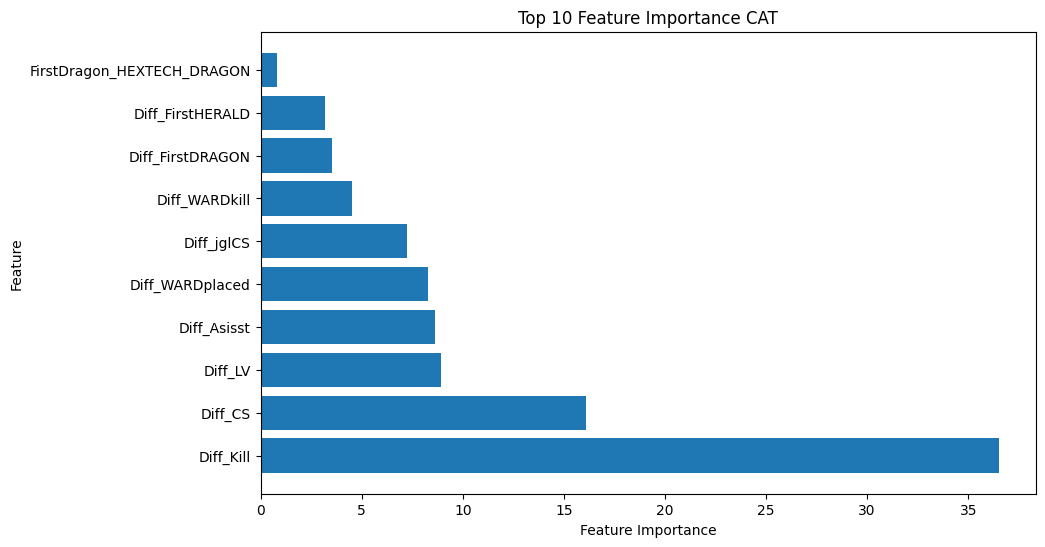

In [32]:
importance = cat.feature_importances_
feature_names = X.columns
feature_importance = list(zip(feature_names, importance))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# 중요도가 높은 상위 n개의 특성 선택
top_n = 10
top_features = feature_importance[:top_n]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), [importance for _, importance in top_features], align='center')
plt.yticks(range(top_n), [feature for feature, _ in top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance CAT')
plt.show()

##### GridSearch

In [185]:
# from sklearn.model_selection import GridSearchCV
# params = {'max_leaf_nodes':[80, 100, 120, 150]
#             }
# lgbm_clf = RandomForestClassifier(max_features='sqrt')
# grid_cv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# estimator = grid_cv.best_estimator_
# pred = estimator.predict(X_test)
# print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

##### 청파소나타 게임 10판으로 예측

In [186]:
# 실제 결과 = 승승패패패승패패패
# cps = pd.read_csv('cps.csv')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|
# cat.fit(X_train, y_train)
# cat.predict(cps)

In [12]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

rankList = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "EMERALD", "DIAMOND", "MASTER", "GRANDMASTER", "CHALLENGER"]
modelNameList = ["CatBoost", "ExtraTree", "LightGBM", "RandomForest"]
colList = ["accuracy_score", "F1_score", "roc_auc_score"]
idxList = [
    ["IRON", "IRON", "IRON", "IRON", 
    "BRONZE", "BRONZE", "BRONZE", "BRONZE", 
    "SILVER", "SILVER", "SILVER", "SILVER", 
    "GOLD", "GOLD", "GOLD", "GOLD", 
    "PLATINUM", "PLATINUM", "PLATINUM", "PLATINUM", 
    "EMERALD", "EMERALD", "EMERALD", "EMERALD", 
    "DIAMOND", "DIAMOND", "DIAMOND", "DIAMOND", 
    "MASTER", "MASTER", "MASTER", "MASTER", 
    "GRANDMASTER", "GRANDMASTER", "GRANDMASTER", "GRANDMASTER", 
    "CHALLENGER", "CHALLENGER", "CHALLENGER", "CHALLENGER"],
    ["CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest",
     "CatBoost", "ExtraTree", "LightGBM", "RandomForest"]
    ]
scoreList = np.empty((0,3))

for rank in rankList:
    data = pd.read_csv(f'../Dataset/preProcessed/{rank}.csv')

    # 랜덤 포레스트
    rf = RandomForestClassifier(max_features='sqrt', max_leaf_nodes=200, random_state=10)
    # 라이트지비엠
    lgbm = LGBMClassifier(n_estimators=100, max_depth=12, num_leaves=25, verbosity=0, min_child_samples=30, random_state=10)
    # 캣부스트
    cat = CatBoostClassifier(iterations=200, depth=7, learning_rate=0.1, l2_leaf_reg=40, verbose=0, random_state=10)
    # 엑스트라트리
    et = ExtraTreesClassifier(max_depth=7, max_features=None, random_state=10)

    x = data[data.columns.difference(['result'])]
    y = data['result']

    modelList = [cat, et, lgbm, rf]
    for i in range(4):
        scores = []
        model = modelList[i]

        x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size = 0.2, random_state = 42)
        y_train = y_train.values.ravel()
        model.fit(x_train, y_train)
        pre_test = model.predict(x_test)
        pre_train = model.predict(x_train)
        if model == cat:
            printModel = f"CatBoost{model.get_params()}"
        else:
            printModel = model
        
        scores.append(str(round(accuracy_score(y_test, pre_test)*100, 2)) + "%")
        scores.append(str(round(f1_score(y_test, pre_test)*100, 2)) + "%")
        scores.append(str(round(roc_auc_score(y_test, pre_test)*100, 2)) + "%")
        scoreList = np.append(scoreList, np.array([scores]), axis=0)

output = pd.DataFrame(scoreList, columns=colList, index=idxList)
print(output)

CatBoostError: 